In [22]:
def sampleNo_to_seconds(sampleNo, sampling_frequency):
    time_in_seconds = sampleNo / sampling_frequency
    return time_in_seconds

def sampleNo_to_ms(sampleNo, sampling_frequency):
    return sampleNo_to_seconds(sampleNo, sampling_frequency)*1000

def seconds_to_sampleNo(time_in_seconds, sampling_frequency):
    sampleNo = time_in_seconds * sampling_frequency
    return sampleNo
    
#print(annotation.sample)
#print(sampleNo_to_ms(annotation.sample,250))

In [37]:
import matplotlib.pyplot as plt
import wfdb
import numpy as np

# Choose database to plot from
db_name = 'BIDMC-CHF' # ECG signal and annotations
#db_name = 'CHF-RR' # annotations only
#db_name = 'NSR' # ECG signal and annotations
#db_name = 'NSR-RR' # annotations only
#db_name = 'FD' # ECG signal and annotations


#sample_numbers = np.arange(record.p_signal.shape[0])

#wfdb.rdann(record_name, extension, sampfrom=0, sampto=None, shift_samps=False, pn_dir=None, return_label_elements=['symbol'], summarize_labels=False)¶


time_start_plot_sec = 2 # choose starting point of plot, in seconds
seconds_to_plot = 4  # choose how many seconds of data to plot
#time_end_plot = 10 # choose end point of plot, in seconds
time_end_plot_sec = time_start_plot_sec + seconds_to_plot


# BIDMC Congestive Heart Failure Database (BIDMC-CHF)
if db_name == 'BIDMC-CHF':
    data_dir_path = '../data/BIDMC-CHF_bidmc-congestive-heart-failure-database-1.0.0/files/'
    file = 'chf01'
    file_path = data_dir_path + file
    record = wfdb.rdrecord(file_path) # Load the record and annotation using WFDB
    # Load the annotation (R-peak positions)
    annotation = wfdb.rdann(file_path, 'ecg')

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval
    print(sample_start); print(sample_end)

    record = wfdb.rdrecord(file_path)
    #annotation = wfdb.rdann(file_path)
    record_selected = wfdb.rdrecord(file_path, sampfrom=sample_start, sampto=sample_end)
    annotation_selected = wfdb.rdann(file_path, 'ecg', sampfrom=sample_start, sampto=sample_end) # update to only include samples within chosen data interval
    print(annotation.sample)
    
    annotations_only = False

# Congestive Heart Failure RR Interval Database (CHF-RR)
if db_name == 'CHF-RR':
    data_dir_path = '../data/CHF-RR_congestive-heart-failure-rr-interval-database-1.0.0/'
    file = 'chf201'
    file_path = data_dir_path + file
    #record = wfdb.rdrecord(file_path)
    annotation = wfdb.rdann(file_path, 'ecg')

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    annotation = wfdb.rdann(file_path, 'ecg', sampfrom=sample_start, sampto=sample_end) # update to only include samples within chosen data interval

    annotations_only = True

# MIT-BIH Normal Sinus Rhythm Database (NSR)
if db_name == 'NSR':
    data_dir_path = '../data/NSR_mit-bih-normal-sinus-rhythm-database-1.0.0/'
    file = '16272'
    file_path = data_dir_path + file
    record = wfdb.rdrecord(file_path)
    annotation = wfdb.rdann(file_path, 'atr')

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    record = wfdb.rdrecord(file_path, sampfrom=sample_start, sampto=sample_end)
    annotation = wfdb.rdann(file_path, 'atr', sampfrom=sample_start, sampto=sample_end)

    annotations_only = False

# Normal Sinus Rhythm RR Interval Database (NSR-RR)
if db_name == 'NSR-RR':
    data_dir_path = '../data/NSR-RR_normal-sinus-rhythm-rr-interval-database-1.0.0/'
    file = 'nsr001'
    file_path = data_dir_path + file
    annotation = wfdb.rdann(file_path, 'ecg', sampfrom=sample_start, sampto=sample_end)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    annotations_only = True

# Fantasia Database (FD)
if db_name == 'FD':
    data_dir_path = '../data/FD_fantasia-database-1.0.0/'
    file = 'f1o01'
    file_path = data_dir_path + file
    record = wfdb.rdrecord(file_path, sampfrom=sample_start, sampto=sample_end)
    annotation = wfdb.rdann(file_path, 'ecg', sampfrom=sample_start, sampto=sample_end)

    sampling_frequency = annotation.fs
    sample_start = seconds_to_sampleNo(time_start_plot_sec, sampling_frequency) # first sample in selected data time interval
    sample_end = seconds_to_sampleNo(time_end_plot_sec, sampling_frequency) # last sample in selected data time interval

    annotations_only = False


#time_in_seconds = sample_numbers / sampling_frequency # x axis in unit 'seconds'
#sample_start_plot = int(time_start_plot * sampling_frequency) # starting point of plot, sample number
#sample_end_plot = int(time_end_plot * sampling_frequency) # end point of plot, sample number

500
1500
[      28      224      438 ... 17993841 17994098 17994362]


In [3]:
if not annotations_only:
    print(type(record.fs))
    print(type(record.p_signal))
    print(record.p_signal[:10,:])
print(annotation.sample)

[     751      848      949 ... 10602971 10603061 10603153]


250


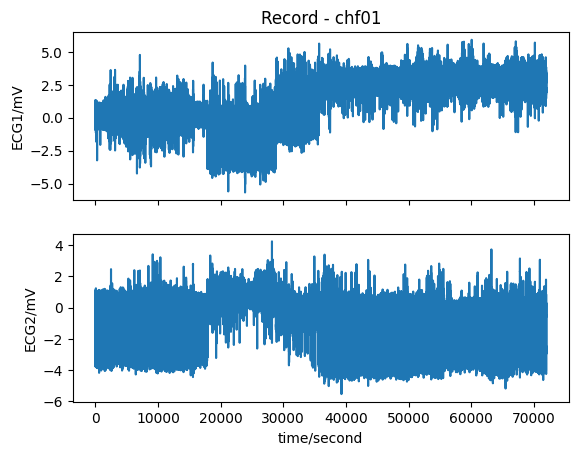

Press enter to continue... 


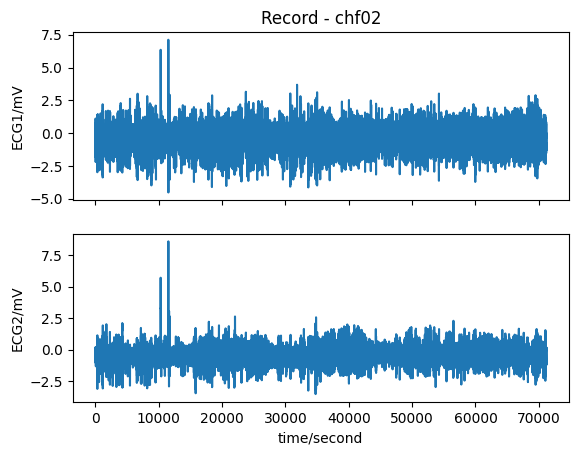

Press enter to continue... 


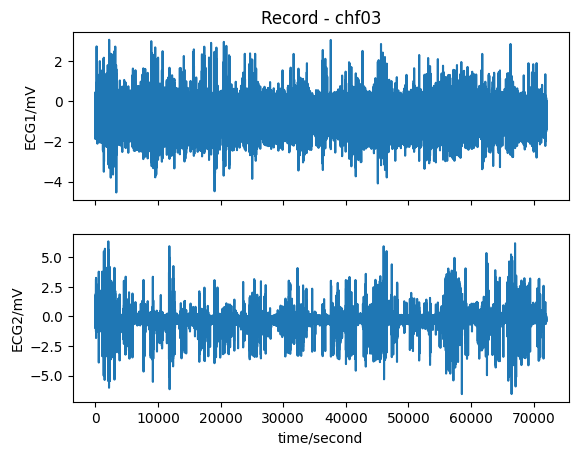

KeyboardInterrupt: Interrupted by user

In [16]:
print(annotation.fs)
#annotation.print_summary()
wfdb.plot.plot_all_records(directory=data_dir_path) 
#wfdb.plot.plot_items(directory=data_dir_path) 

(1000,)
(17994491,)
(1000,)


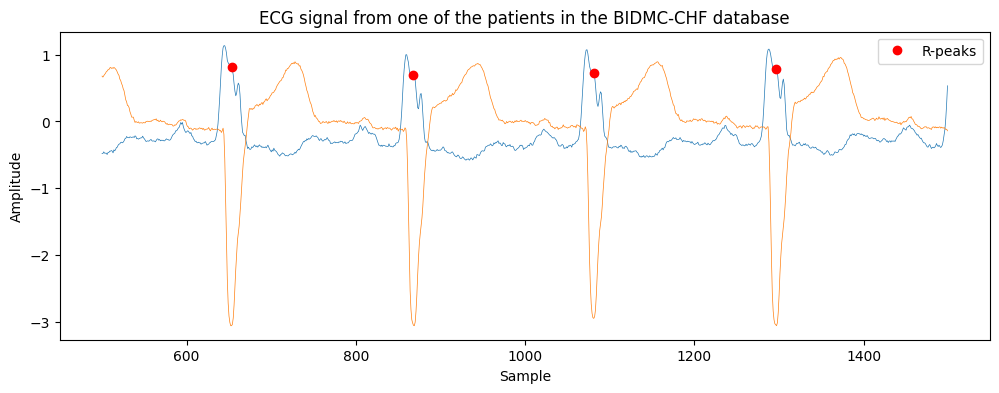

In [40]:
#sampling_frequency = record.fs # sampling frequency of heart data. (here: 250 data samples per second)
sampling_frequency = annotation.fs # sampling frequency of heart data. (here: 250 data samples per second)

'''
sample_numbers = np.arange(record.p_signal.shape[0])

time_in_seconds = sample_numbers / sampling_frequency # x axis in unit 'seconds'

time_start_plot = 2 # choose starting point of plot, in seconds
seconds_to_plot = 4  # choose how many seconds of data to plot
#time_end_plot = 10 # choose end point of plot, in seconds
time_end_plot = time_start_plot + seconds_to_plot

sample_start_plot = int(time_start_plot * sampling_frequency) # starting point of plot, sample number
sample_end_plot = int(time_end_plot * sampling_frequency) # end point of plot, sample number
'''


#samples_to_plot = int(seconds_to_plot * sampling_frequency)


# Plot the ECG signals
# x_start, x_stop = 0, 100
x_start, x_stop = sample_start, sample_end
x_list = np.arange(x_start, x_stop)


plt.figure(figsize=(12, 4))

unit = 'sampleNo'
#unit = 'seconds'
#unit = 'ms'

plot_ch2 = True
#plot_ch2 = False
lw = 0.5

if annotations_only:
    if unit == 'sampleNo': 
        plt.xlabel('Sample')
        
        # Overlay the R-peak annotations
        annotations = annotation.sample  # locations of annotations
        annotations_in_range = np.array([ann for ann in annotations if x_start <= ann < x_stop]) # keep only annotations in the chosen range

        # Use zeros for y-values to plot the annotations as just markers on the x-axis
        y_values = np.zeros(len(annotations_filtered))
        
        plt.plot(annotations_in_range, y_values, 'ro', label='R-peaks')
    
    elif unit == 'seconds':
        #plt.plot(time_in_seconds[x_start:x_stop], signal_ch1_sub, lw=lw)
        plt.xlabel('Time (s)')
        
    elif unit == 'ms':
        #plt.plot((time_in_seconds*1000)[x_start:x_stop], signal_ch1_sub, lw=lw)
        plt.xlabel('Time (ms)')
        #plt.plot((time_in_seconds*1000)[x_start:x_stop], signal_ch2_sub, lw=lw) if plot_ch2 else None
        # Annotations:
        #plt.plot(annotation.sample + x_start, signal_ch1_sub[annotation.sample + x_start], 'ro', label='R-peaks')
        annotations = annotation.sample # locations of annotations
        annotations_in_range = np.array([ann for ann in annotations if x_start <= ann < x_stop]) # keep only annotations in the chosen range

        annotations_ms = sampleNo_to_ms(annotations_in_range, sampling_frequency) # locations of annotations, in time (ms)

        #plt.plot(annotations_ms, signal_ch1[annotations_in_range], 'ro', label='R-peaks')

else:
    signal_ch1 = record.p_signal[:, 0]
    signal_ch2 = record.p_signal[:, 1]
    
    #signal_ch1_sub = signal_ch1[x_start:x_stop]
    #signal_ch2_sub = signal_ch2[x_start:x_stop]
    
    if unit == 'sampleNo':
        print(x_list.shape); print(signal_ch1.shape); print(signal_ch1[x_list].shape)
        #print(x_list); print(signal_ch1)
        plt.plot(x_list, signal_ch1[x_list], lw=lw)  # Plot first channel of ECG data
        plt.xlabel('Sample')
        plt.plot(x_list, signal_ch2[x_list], lw=lw) if plot_ch2 else None
    
        # Plot the ECG signal
        #plt.plot(record.p_signal[:, 0], label='ECG Signal')
        
        # Overlay the R-peak annotations
        annotations = annotation_selected.sample  # locations of annotations
        #plt.plot(annotation.sample, signal_ch1[annotations], 'ro', label='R-peaks')
        plt.plot(annotations, signal_ch1[annotations], 'ro', label='R-peaks')
    
    elif unit == 'seconds':
        plt.plot(time_in_seconds[x_start:x_stop], signal_ch1, lw=lw)
        plt.xlabel('Time (s)')
        
    elif unit == 'ms':
        plt.plot((time_in_seconds*1000)[x_start:x_stop], signal_ch1, lw=lw)
        plt.xlabel('Time (ms)')
        plt.plot((time_in_seconds*1000)[x_start:x_stop], signal_ch2, lw=lw) if plot_ch2 else None
        # Annotations:
        #plt.plot(annotation.sample + x_start, signal_ch1_sub[annotation.sample + x_start], 'ro', label='R-peaks')
        annotations = annotation.sample # locations of annotations
        annotations_in_range = np.array([ann for ann in annotations if x_start <= ann < x_stop]) # keep only annotations in the chosen range
        #print(annotations_in_range); print(type(annotations_in_range))
        annotations_ms = sampleNo_to_ms(annotations_in_range, sampling_frequency) # locations of annotations, in time (ms)
        #print(annotations_ms); print(type(annotations_ms))
        plt.plot(annotations_ms, signal_ch1[annotations_in_range], 'ro', label='R-peaks')


plt.title(f'ECG signal from one of the patients in the {db_name} database')
plt.ylabel('Amplitude')
plt.legend()
plt.show()